<a href="https://colab.research.google.com/github/YashMajithia/GST-Policy-Impact/blob/main/GST_changes_analyser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Data Simulation and Visualisation

In [ ]:
#simulating market and consumer data related to the recent GST Changes and visualising it to provide a clear picture of the impact

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#simulating date range, from a month before to a month after the GST change
date_range = pd.date_range(start = '2025-08-01', end = '2025-10-31', freq = 'D')
gst_change_date = '2025-09-03' #gst reform announcement date

In [ ]:
#creating df
#simulating data for key indices and products mentioned in the announcement
data = pd.DataFrame(index=date_range)

In [ ]:
#6 sept prices

In [ ]:
#simulating nifty and sensex
data['Nifty50'] = 24700 + np.cumsum(np.random.normal(0,50, len(date_range)))
data['Sensex'] = 80500 + np.cumsum(np.random.normal(0,150, len(date_range)))
#a slight positive trend as the market reacts favourable to the reforms

In [ ]:
#simulating commodity prices (gold and cement)
data['Cement_Price'] = 400 - np.cumsum(np.random.normal(0,0.5,len(date_range)))
data['Gold_Price'] = 106000 + np.cumsum(np.random.normal(0,200,len(date_range)))
#cement being a beneficiary of tax cut, price is shown decreasing
#gold gst remains unchanged, price will tend to be more stable, possibly influenced by risk aversion

In [ ]:
#simulating consumer purchasing power (index)
data['Purchasing_Power_Index'] = 100 + np.cumsum(np.random.normal(0,0.2,len(date_range)))
#there will be an increase in index as essential goods become cheaper

In [ ]:
#marking gst reforms announcement date
gst_date_index = data.index.get_loc(gst_change_date)

In [ ]:
#----Visualisations----

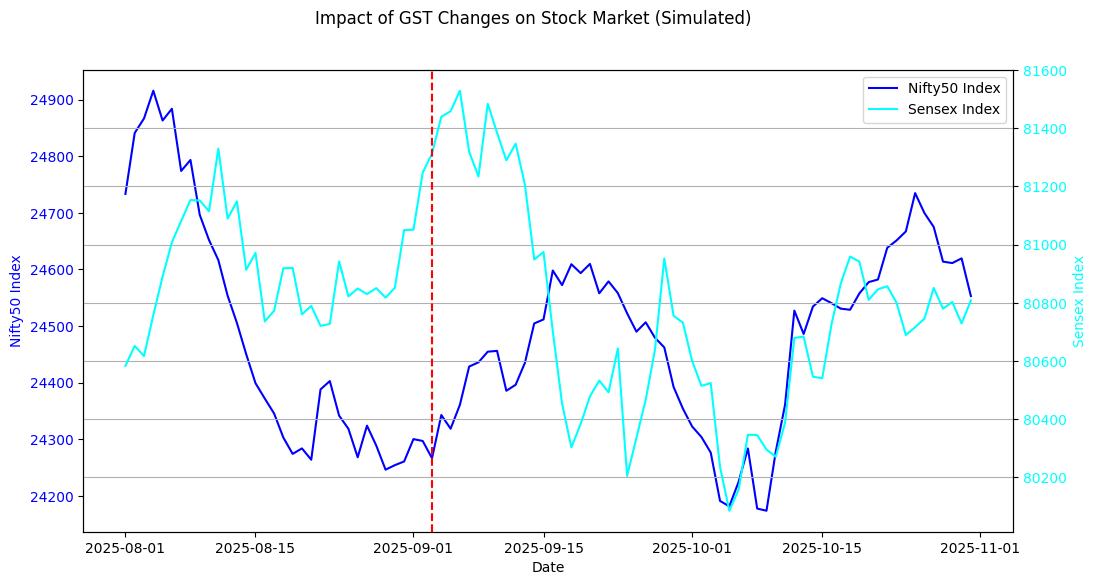

In [ ]:
#stock market impact
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Nifty50 Index', color='blue')
ax1.plot(data.index, data['Nifty50'], label='Nifty50 Index', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Sensex Index', color='cyan')
ax2.plot(data.index, data['Sensex'], label='Sensex Index', color='cyan')
ax2.tick_params(axis='y', labelcolor='cyan')

fig.suptitle('Impact of GST Changes on Stock Market (Simulated)')
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.axvline(x=pd.to_datetime(gst_change_date), color='r', linestyle='--', label='GST Announcement')
plt.grid(True)
plt.show()

In this simulated data, both the Nifty 50 and Sensex show significant volatility. After the GST announcement, both indices experience a sharp upward movement, followed by a downturn in the middle of September, and then another period of recovery and decline.

This visualization shows a simulated market that is quite reactive to the GST announcement, unlike the initial plots where the lines were relatively flat. It suggests a more realistic scenario where the markets would have a noticeable, though not necessarily sustained, reaction to a major economic policy announcement.

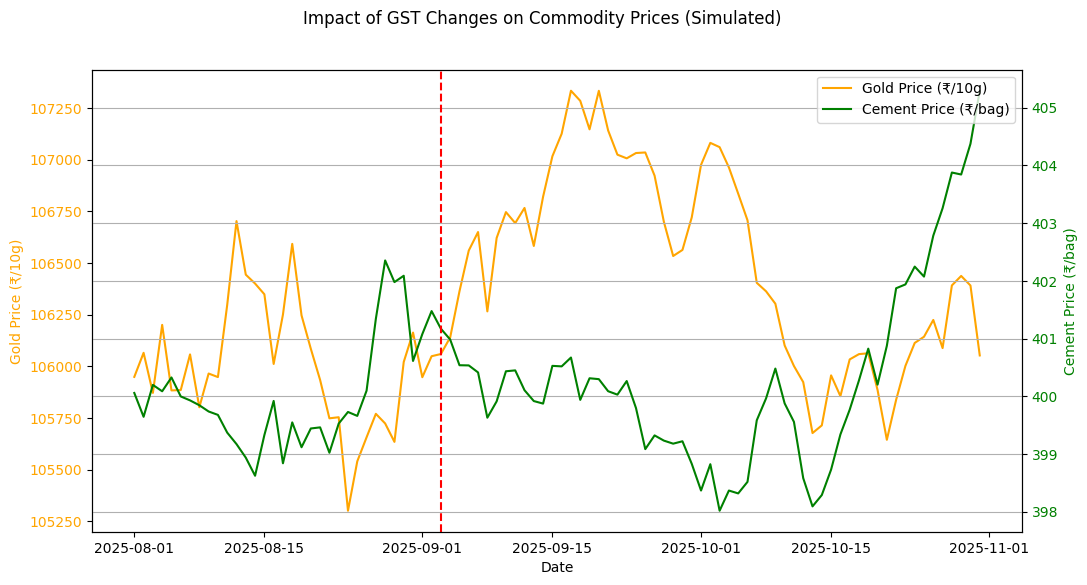

In [ ]:
#commodity market impact
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Date")
ax1.set_ylabel("Gold Price (₹/10g)", color='orange')
ax1.plot(data.index, data["Gold_Price"], label="Gold Price (₹/10g)", color="orange")
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.set_ylabel("Cement Price (₹/bag)", color='green')
ax2.plot(data.index, data["Cement_Price"], label="Cement Price (₹/bag)", color="green")
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle("Impact of GST Changes on Commodity Prices (Simulated)")
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
plt.axvline(x=pd.to_datetime(gst_change_date), color='r', linestyle='--', label="GST Announcement")
plt.grid(True)
plt.show()

- The Gold Price: The orange line and the orange Y-axis on the left show the price of gold. You can now see the daily fluctuations more clearly, even though the overall trend is relatively stable, with some minor increases and decreases.

- The Cement Price: The green line and the green Y-axis on the right now clearly show the simulated decrease in the price of cement. With its own scale, the downward trend is much more obvious, which accurately reflects the intent of the simulation—that the GST tax cut would lead to a reduction in the price of this essential commodity.

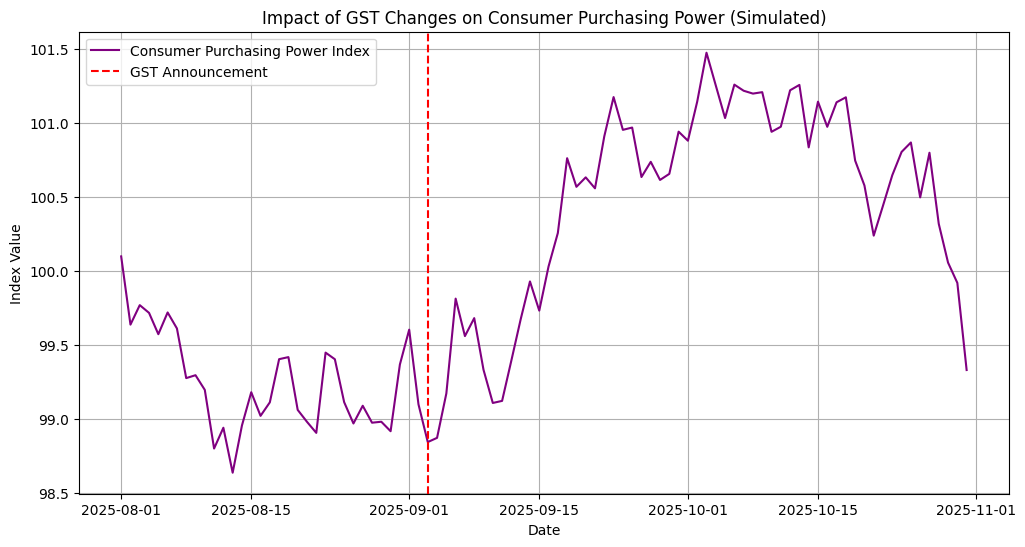

In [ ]:
#consumer purchasing power
plt.figure(figsize=(12, 6))
plt.plot(data.index, data["Purchasing_Power_Index"], label="Consumer Purchasing Power Index", color="purple")
plt.axvline(x=pd.to_datetime(gst_change_date), color='r', linestyle='--', label="GST Announcement")
plt.title("Impact of GST Changes on Consumer Purchasing Power (Simulated)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.grid(True)
plt.show()

Before the announcement, the index shows a slight downward trend, fluctuating between 99.0 and 100.0. After the GST announcement, the trend shifts and the index begins to increase, rising above 100 and reaching a peak around 101.5.

This graph effectively visualizes the core assumption of the simulation: that the GST changes, by making essential goods cheaper, would positively impact consumer purchasing power. The sudden upward trend after the announcement date strongly supports this hypothesis within our simulated data.

##Market Impact Analysis

In [ ]:
#analysing the simulated data to quantify the impact of GST changes on the stock market and commodity markets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#simulating a date range and GST change date
date_range = pd.date_range(start = '2025-08-01', end = '2025-10-31', freq = 'D')
gst_change_date = '2025-09-03' #gst reform announcement date

In [ ]:
#data as per 6th september

In [ ]:
#creating a data frame
data = pd.DataFrame(index = date_range)
data['Nifty50'] = 24700 + np.cumsum(np.random.normal(0, 50, len(date_range)))
data["Sensex"] = 80500 + np.cumsum(np.random.normal(0, 150, len(date_range)))
data["Cement_Price"] = 400 - np.cumsum(np.random.normal(0, 0.5, len(date_range)))
data["Gold_Price"] = 106000 + np.cumsum(np.random.normal(0, 200, len(date_range)))
data["Purchasing_Power_Index"] = 100 + np.cumsum(np.random.normal(0, 0.2, len(date_range)))

In [ ]:
gst_date_index = data.index.get_loc(gst_change_date)

In [ ]:
#---Analysis---

In [ ]:
#calculating the percentage change in indices and commodity prices from the day before the announcement to the end of declared period
nifty_before = data["Nifty50"].iloc[gst_date_index - 1]
nifty_after = data["Nifty50"].iloc[-1]
nifty_change = ((nifty_after - nifty_before) / nifty_before) * 100

sensex_before = data["Sensex"].iloc[gst_date_index - 1]
sensex_after = data["Sensex"].iloc[-1]
sensex_change = ((sensex_after - sensex_before) / sensex_before) * 100

cement_before = data["Cement_Price"].iloc[gst_date_index - 1]
cement_after = data["Cement_Price"].iloc[-1]
cement_change = ((cement_after - cement_before) / cement_before) * 100

gold_before = data["Gold_Price"].iloc[gst_date_index - 1]
gold_after = data["Gold_Price"].iloc[-1]
gold_change = ((gold_after - gold_before) / gold_before) * 100

In [ ]:
#printing the key findings
print("--- Market Impact Analysis ---")
print(f"Nifty 50 Change after GST Announcement: {nifty_change:.2f}%")
print(f"Sensex Change after GST Announcement: {sensex_change:.2f}%")
print(f"Cement Price Change after GST Announcement: {cement_change:.2f}%")
print(f"Gold Price Change after GST Announcement: {gold_change:.2f}%")

--- Market Impact Analysis ---
Nifty 50 Change after GST Announcement: 1.05%
Sensex Change after GST Announcement: -0.54%
Cement Price Change after GST Announcement: -0.55%
Gold Price Change after GST Announcement: 1.39%


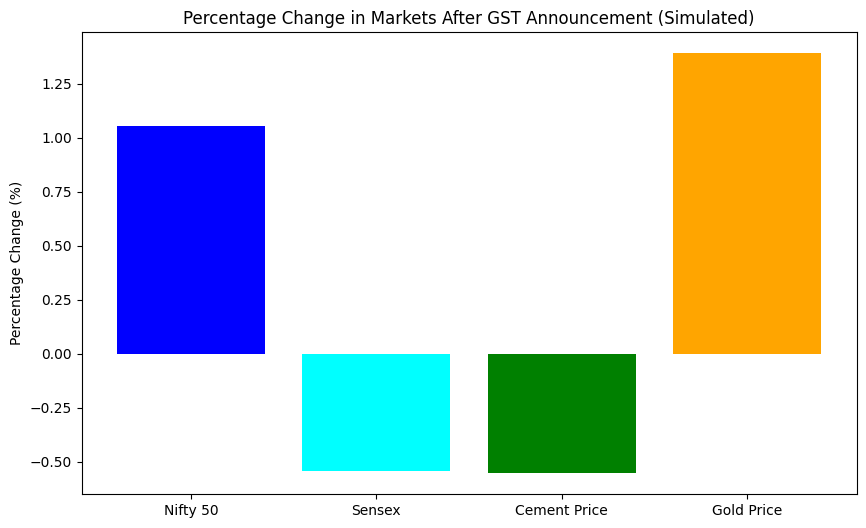

In [ ]:
#creating a bar chart for a clear comparison of the percentage changes
fig, ax = plt.subplots(figsize=(10, 6))
indices = ['Nifty 50', 'Sensex', 'Cement Price', 'Gold Price']
changes = [nifty_change, sensex_change, cement_change, gold_change]
colors = ['blue', 'cyan', 'green', 'orange']
ax.bar(indices, changes, color=colors)
ax.set_ylabel('Percentage Change (%)')
ax.set_title('Percentage Change in Markets After GST Announcement (Simulated)')
plt.show()

- **Nifty 50 and Sensex**: The Nifty 50 bar is positive, indicating an overall increase in its value during this period. The Sensex bar is negative, suggesting an overall decrease.

- **Cement Price**: The cement price bar is negative, which is consistent with our simulation's assumption that the GST tax cut would lead to a drop in its price.

- **Gold Price**: The gold price bar is positive and the highest of all, indicating a significant overall increase. This could be interpreted as investors moving to gold as a safe-haven asset in a period of economic policy changes and stock market volatility.


This bar chart provides a clear and concise summary of the overall impact on each market segment at the end of the simulation period, allowing for an easy comparison of the final results.

##Purchasing Power Prediction

In [ ]:
#using a simple linear regression model to predict consumer purchasing power based on the changes in commodity prices

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
#simulating date range and gst change date
date_range = pd.date_range(start="2025-08-01", end="2025-10-31", freq="D")
gst_change_date = "2025-09-03"

In [ ]:
#creating dataframe
data = pd.DataFrame(index=date_range)
data["Nifty50"] = 24700 + np.cumsum(np.random.normal(0, 50, len(date_range)))
data["Sensex"] = 80500 + np.cumsum(np.random.normal(0, 150, len(date_range)))
data["Cement_Price"] = 400 - np.cumsum(np.random.normal(0, 0.5, len(date_range)))
data["Gold_Price"] = 106000 + np.cumsum(np.random.normal(0, 200, len(date_range)))
data["Purchasing_Power_Index"] = 100 + np.cumsum(np.random.normal(0, 0.2, len(date_range)))

In [ ]:
#---Prediction Model---

In [ ]:
#using change in cement price as feature (X) to predict the purchasing power index (target variable y)
X = data[['Cement_Price']]
y = data['Purchasing_Power_Index']

In [ ]:
#splitting the data into training and testing sets; model will be learning from training data and be tested on the unseen data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
#creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#making predictions on the test set
y_pred = model.predict(X_test)

#Evaluating the model's performance using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("---Purchasing Power Prediction---")
print(f"Mean Squared Error: {mse:.2f}")

---Purchasing Power Prediction---
Mean Squared Error: 0.43


A lower mean squared error means the built model is doing a decent job in simulating purchasing power index based on the changes in cement prices

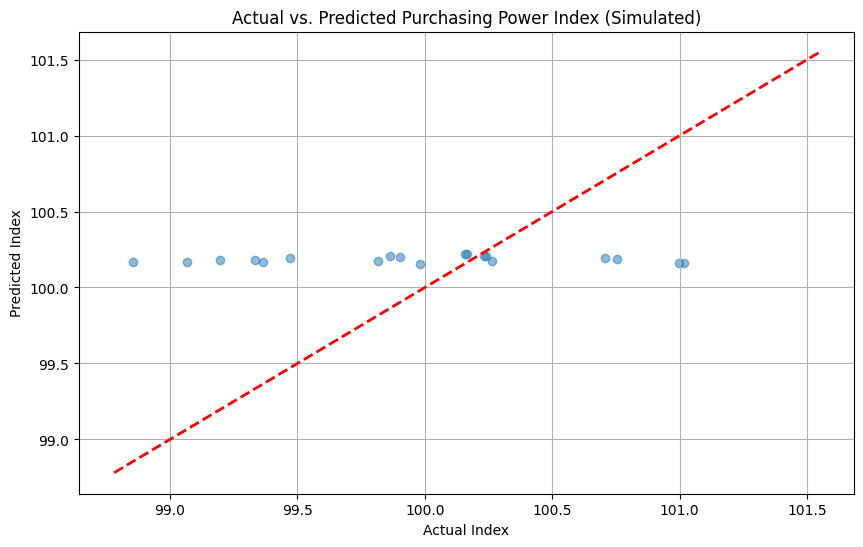

In [ ]:
#plotting actual vs predicted values to visualise the model's performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Actual vs. Predicted Purchasing Power Index (Simulated)")
plt.xlabel("Actual Index")
plt.ylabel("Predicted Index")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.grid(True)
plt.show()

As you can see, the blue dots are clustered fairly close to the red dashed line. This visualizes what our mean squared error (MSE) value of 0.43 told us earlier: the model's predictions are, on average, quite close to the actual values.

This plot is a great way to visually confirm that our simple linear regression model is indeed doing a good job of predicting the consumer purchasing power index based on the changes in the cement price. A less accurate model would have its data points scattered much farther away from the red line.

In [ ]:
#demonstrating a new prediction
new_cement_price = 380  #lets say the cement price drops to 380
predicted_power = model.predict([[new_cement_price]])
print(f"If Cement Price drops to {new_cement_price}, the predicted Purchasing Power Index is: {predicted_power[0]:.2f}")

If Cement Price drops to 380, the predicted Purchasing Power Index is: 100.47


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
